# Python imports

In [1]:
# Show plots as part of the notebook (this is a Jupyter-specific operation)
%matplotlib inline
import time
import matplotlib.pyplot as plt
import requests
import xmltodict
# Standard library packages
import os

# Import Pandas and Seaborn
import pandas as pd
import seaborn as sns

# Import Biopython tools for running local BLASTX
from Bio.Blast.Applications import NcbiblastxCommandline
from Bio.Blast.Applications import NcbiblastnCommandline

In [2]:
from datetime import datetime
from pytz import timezone

now_time = datetime.now(timezone('America/Chicago'))
print(now_time.strftime('%I:%M:%S %p'))

03:16:29 PM


In [ ]:
#blastn -task blastn -query example/unknown.fa -db db/bacteria/bacteria_nucl -out example/blastn_bacteria.out

# Running and analyzing a local BLASTN search for Nov112020-ALL-R1.fasta

In [7]:
cmd_blastn = NcbiblastnCommandline(query='Nov112020-ALL-R1.fasta',
                      out='Nov112020-ALL-R1_blastn.tab',
                      outfmt=6,
                      db='db_ref_ALL_16S/db_ref_ALL_16S',
                      num_threads = 64)

In [8]:
# Get a working command-line
print(cmd_blastn)

blastn -out Nov112020-ALL-R1_blastn.tab -outfmt 6 -query Nov112020-ALL-R1.fasta -db db_ref_ALL_16S/db_ref_ALL_16S -num_threads 64


In [9]:
%%time
cmd_blastn()

CPU times: user 773 ms, sys: 497 ms, total: 1.27 s
Wall time: 4h 49min 52s


('', '')

In [ ]:
##https://widdowquinn.github.io/2018-03-06-ibioic/02-sequence_databases/03-programming_for_blast.html#runblastx
# Run BLASTX, and catch STDOUT/STDERR
# !! Do not execute cell if skipping computation !!
#stdout, stderr = cmd_blastn()

# Check STDOUT, STDERR
#print("STDOUT: %s" % stdout)
#print("STDERR: %s" % stderr)

# EDA for Results: "Nov112020-ALL-R1_blastn.tab"

In [10]:
# !! If you are skipping computational steps, uncomment the line below !!
#blastout = os.path.join('prepped', 'kitasatospora', 'AMK19_00175_blastx_kitasatospora.tab')  # BLAST output

# Read BLASTX output
results = pd.read_csv("Nov112020-ALL-R1_blastn.tab", sep="\t", header=None)

In [11]:
# Inspect results table
results.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,A00842:193:HMWFWDRXY:1:2101:25418:1016,MN240357.1,100.000,28,0,0,113,140,22180,22207,4.040000e-06,52.8
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0


In [12]:
# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Assign headers
results.columns = headers

# Inspect modified table
results.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:25418:1016,MN240357.1,100.000,28,0,0,113,140,22180,22207,4.040000e-06,52.8
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0


In [13]:
# Show a summary of the results table data
results.describe()

,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
count,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07,5.236909e+07
mean,9.068401e+01,1.220127e+02,1.082300e+01,9.475163e-01,1.131649e+01,1.317143e+02,6.598661e+04,6.598679e+04,2.407423e-08,1.584538e+02
std,4.996050e+00,3.497397e+01,6.723314e+00,1.574886e+00,2.160333e+01,2.922587e+01,1.920402e+05,1.920402e+05,1.520291e-05,5.256762e+01
min,7.284800e+01,2.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.600000e+01,1.000000e+00,1.000000e+00,1.700000e-74,3.810000e+01
25%,8.739500e+01,9.800000e+01,5.000000e+00,0.000000e+00,1.000000e+00,1.220000e+02,1.308000e+03,1.293000e+03,4.900000e-50,1.170000e+02
50%,9.103400e+01,1.390000e+02,1.000000e+01,0.000000e+00,1.000000e+00,1.480000e+02,3.299700e+04,3.299600e+04,2.310000e-38,1.590000e+02
75%,9.420300e+01,1.510000e+02,1.500000e+01,1.000000e+00,9.000000e+00,1.510000e+02,9.374900e+04,9.374300e+04,1.410000e-25,1.980000e+02
max,1.000000e+02,1.810000e+02,4.100000e+01,2.000000e+01,1.240000e+02,1.510000e+02,6.574866e+06,6.574882e+06,1.100000e-01,2.790000e+02


In [14]:
# Show all subject matches
print(results['subject'])

0            MN240357.1
1           NC_028502.1
2            KR336545.1
3           NC_058274.1
4            MW899036.1
               ...     
52369083     KX828176.1
52369084     AP018038.1
52369085     KX131180.1
52369086     KX756229.1
52369087     MK995333.1
Name: subject, Length: 52369088, dtype: object


In [15]:
results.shape

(52369088, 12)

## Filter BLASTn Results (E-Value < 10 ^ -20)

In [16]:
results_target = results.loc[results['e_value'] < 1e-20]

In [17]:
results_target

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0
5,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_022263.1,86.364,110,11,4,7,113,29549,29441,1.410000e-25,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52369035,A00842:193:HMWFWDRXY:2:2278:20871:36855,NC_045244.1,92.126,127,10,0,1,127,58797,58923,1.780000e-44,180.0
52369036,A00842:193:HMWFWDRXY:2:2278:20871:36855,MK217824.1,92.126,127,10,0,1,127,58797,58923,1.780000e-44,180.0
52369037,A00842:193:HMWFWDRXY:2:2278:20871:36855,NC_027721.1,91.339,127,11,0,1,127,76804,76930,8.260000e-43,174.0
52369038,A00842:193:HMWFWDRXY:2:2278:20871:36855,KR709240.1,91.339,127,11,0,1,127,76804,76930,8.260000e-43,174.0


In [18]:
results_target.shape

(43888110, 12)

In [19]:
results_target.to_csv('01_db_blastn_Nov112020_filtered_1e-20_subj.csv', index=False)

In [20]:
df = pd.read_csv('01_db_blastn_Nov112020_filtered_1e-20_subj.csv')

In [21]:
df.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_022263.1,86.364,110,11,4,7,113,29549,29441,1.410000e-25,117.0


In [22]:
df['subject'].nunique()

9883

### Retrieving (efetch) scientific name (GBSeq_definition) from NCBI nucleotide database (nuccore)
#### seq id header in each 16S fasta sequences of built database which were succsessfully blasted (subject column) will be translated into the corresponding "Genus species" name

In [23]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/{}"
db = "nuccore"

In [24]:
def get_taxon_name(tax_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}&rettype=json".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        Definition = efetch_dict['GBSet']['GBSeq']['GBSeq_definition']
        Definition = Definition.split(',')
        Definition = Definition[0]
        time.sleep(0.5)
    except:
        Definition = tax_id
        pass
 
    return Definition

In [25]:
def enrich_dataset(df):
    taxon_value = df['subject']
    ScientificName = get_taxon_name(taxon_value)
    df['taxon_name'] = ScientificName
    return df

In [26]:
df = df['subject'].value_counts()
df = pd.Series(df)
df.to_csv('02_Nov112020-ALL-R1_blastn_1e-20.csv')

In [27]:
df = pd.read_csv('02_Nov112020-ALL-R1_blastn_1e-20.csv')
df.columns.values[0] = "subject"
df.columns.values[1] = "count"

In [28]:
df.head()

,subject,count
0,NC_011600.1,150242
1,EU912438.1,148386
2,NC_046005.1,108333
3,MG739403.1,107667
4,NC_053868.1,106131


In [29]:
df.shape

(9883, 2)

In [30]:
%%time
df = df.apply(enrich_dataset, axis=1)

CPU times: user 6min 49s, sys: 27.4 s, total: 7min 16s
Wall time: 4h 9min 4s


In [31]:
df.to_csv('03_Nov112020-ALL-R1_blastn_1e-20-TaxaName.csv', index=False)

In [32]:
df = pd.read_csv('03_Nov112020-ALL-R1_blastn_1e-20-TaxaName.csv')

In [33]:
df.shape

(9883, 3)

In [34]:
df.describe()

,count
count,9883.000000
mean,4440.767985
std,14135.112062
min,1.000000
25%,262.000000
50%,960.000000
75%,2004.000000
max,150242.000000


In [35]:
df.head(50)

,subject,count,taxon_name
0,NC_011600.1,150242,Vaucheria litorea chloroplast
1,EU912438.1,148386,Vaucheria litorea chloroplast
2,NC_046005.1,108333,Cladosiphon okamuranus plastid
3,MG739403.1,107667,Cladosiphon okamuranus plastid
4,NC_053868.1,106131,Schizocladia ischiensis culture CCMP:2287 chlo...
5,MT226925.1,105751,Schizocladia ischiensis chloroplast
6,NC_057231.1,105063,Laminaria rodriguezii chloroplast
7,MT732096.1,104739,Laminaria rodriguezii chloroplast
8,NC_044689.1,104570,Laminaria digitata chloroplast
9,NC_018523.1,104569,Saccharina japonica chloroplast


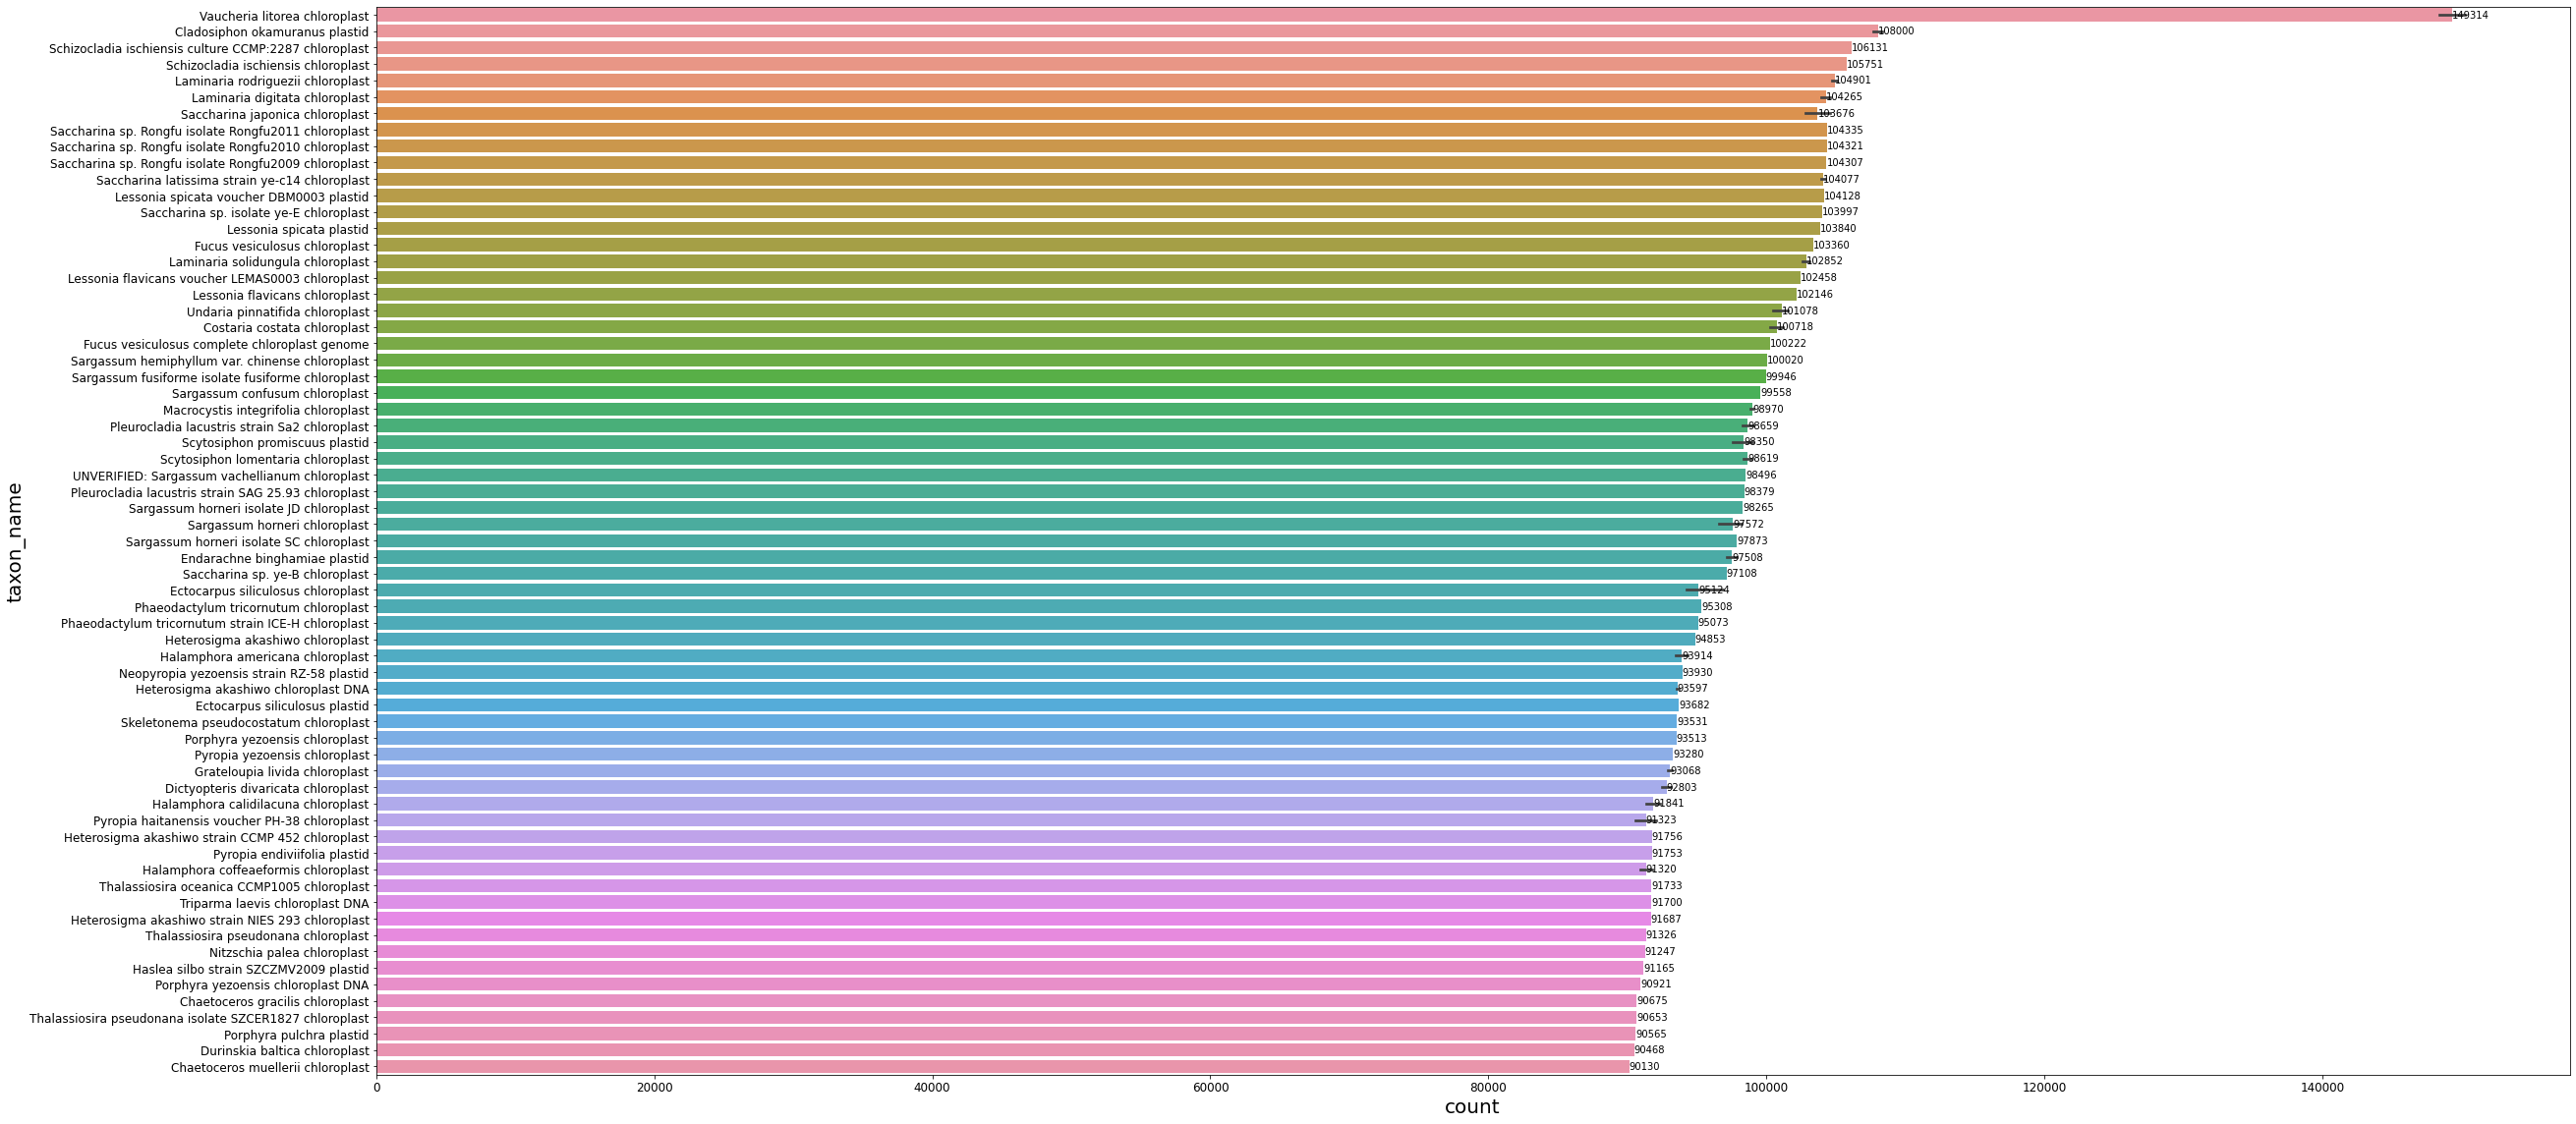

In [36]:
plt.figure(figsize = (40,20))
ax = sns.barplot(y='taxon_name', x='count', data=df[df['count'] >= 90000])
ax.set_xlabel("count",fontsize=20)
ax.set_ylabel("taxon_name",fontsize=20)
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')
    
plt.savefig('03_Nov112020_1e-20.jpeg', dpi=700)

# Filter BLASTn Results (E-Value < 10 ^ -6)

In [37]:
results_target = results.loc[results['e_value'] < 0.000001]

In [38]:
results_target.shape

(51978014, 12)

In [39]:
results_target.to_csv('01_db_blastn_Nov112020_filtered_1e-6_subj.csv', index=False)

In [40]:
df = pd.read_csv('01_db_blastn_Nov112020_filtered_1e-6_subj.csv')

In [41]:
df.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_028502.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
1,A00842:193:HMWFWDRXY:1:2101:18267:1031,KR336545.1,87.755,147,18,0,1,147,89967,90113,2.970000e-42,172.0
2,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_058274.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0
3,A00842:193:HMWFWDRXY:1:2101:18267:1031,MW899036.1,85.714,147,21,0,1,147,84675,84821,2.990000e-37,156.0
4,A00842:193:HMWFWDRXY:1:2101:18267:1031,NC_022263.1,86.364,110,11,4,7,113,29549,29441,1.410000e-25,117.0


In [42]:
df.shape

(51978014, 12)

In [43]:
df['subject'].nunique()

10025

### Retrieving (efetch) scientific name (GBSeq_definition) from NCBI nucleotide database (nuccore)
#### seq id header in each 16S fasta sequences of built database which were succsessfully blasted (subject column) will be translated into the corresponding "Genus species" name

In [44]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/{}"
db = "nuccore"

In [45]:
def get_taxon_name(tax_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}&rettype=json".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        Definition = efetch_dict['GBSet']['GBSeq']['GBSeq_definition']
        Definition = Definition.split(',')
        Definition = Definition[0]
        time.sleep(0.5)
    except:
        Definition = tax_id
        pass
 
    return Definition

In [46]:
def enrich_dataset(df):
    taxon_value = df['subject']
    ScientificName = get_taxon_name(taxon_value)
    df['taxon_name'] = ScientificName
    return df

In [47]:
df = df['subject'].value_counts()
df = pd.Series(df)
df.to_csv('02_Nov112020-ALL-R1_blastn_1e-6.csv')

In [48]:
df = pd.read_csv('02_Nov112020-ALL-R1_blastn_1e-6.csv')
df.columns.values[0] = "subject"
df.columns.values[1] = "count"

In [49]:
df.head()

,subject,count
0,NC_011600.1,162708
1,EU912438.1,160186
2,NC_046005.1,122005
3,MG739403.1,120927
4,NC_057231.1,119137


In [50]:
df.shape

(10025, 2)

In [51]:
%%time
df = df.apply(enrich_dataset, axis=1)

CPU times: user 7min 8s, sys: 25.5 s, total: 7min 33s
Wall time: 4h 13min 17s


In [52]:
df.to_csv('03_Nov112020-ALL-R1_blastn_1e-6-TaxaName.csv', index=False)

In [53]:
df = pd.read_csv('03_Nov112020-ALL-R1_blastn_1e-6-TaxaName.csv')

In [54]:
df.shape

(10025, 3)

In [55]:
df.describe()

,count
count,10025.000000
mean,5184.839302
std,16169.736850
min,1.000000
25%,365.000000
50%,1083.000000
75%,2408.000000
max,162708.000000


In [56]:
df.head(50)

,subject,count,taxon_name
0,NC_011600.1,162708,Vaucheria litorea chloroplast
1,EU912438.1,160186,Vaucheria litorea chloroplast
2,NC_046005.1,122005,Cladosiphon okamuranus plastid
3,MG739403.1,120927,Cladosiphon okamuranus plastid
4,NC_057231.1,119137,Laminaria rodriguezii chloroplast
5,MT732096.1,118599,Laminaria rodriguezii chloroplast
6,NC_044689.1,118496,Laminaria digitata chloroplast
7,NC_018523.1,118234,Saccharina japonica chloroplast
8,MK058526.1,117754,Saccharina sp. Rongfu isolate Rongfu2011 chlor...
9,MK058525.1,117736,Saccharina sp. Rongfu isolate Rongfu2010 chlor...


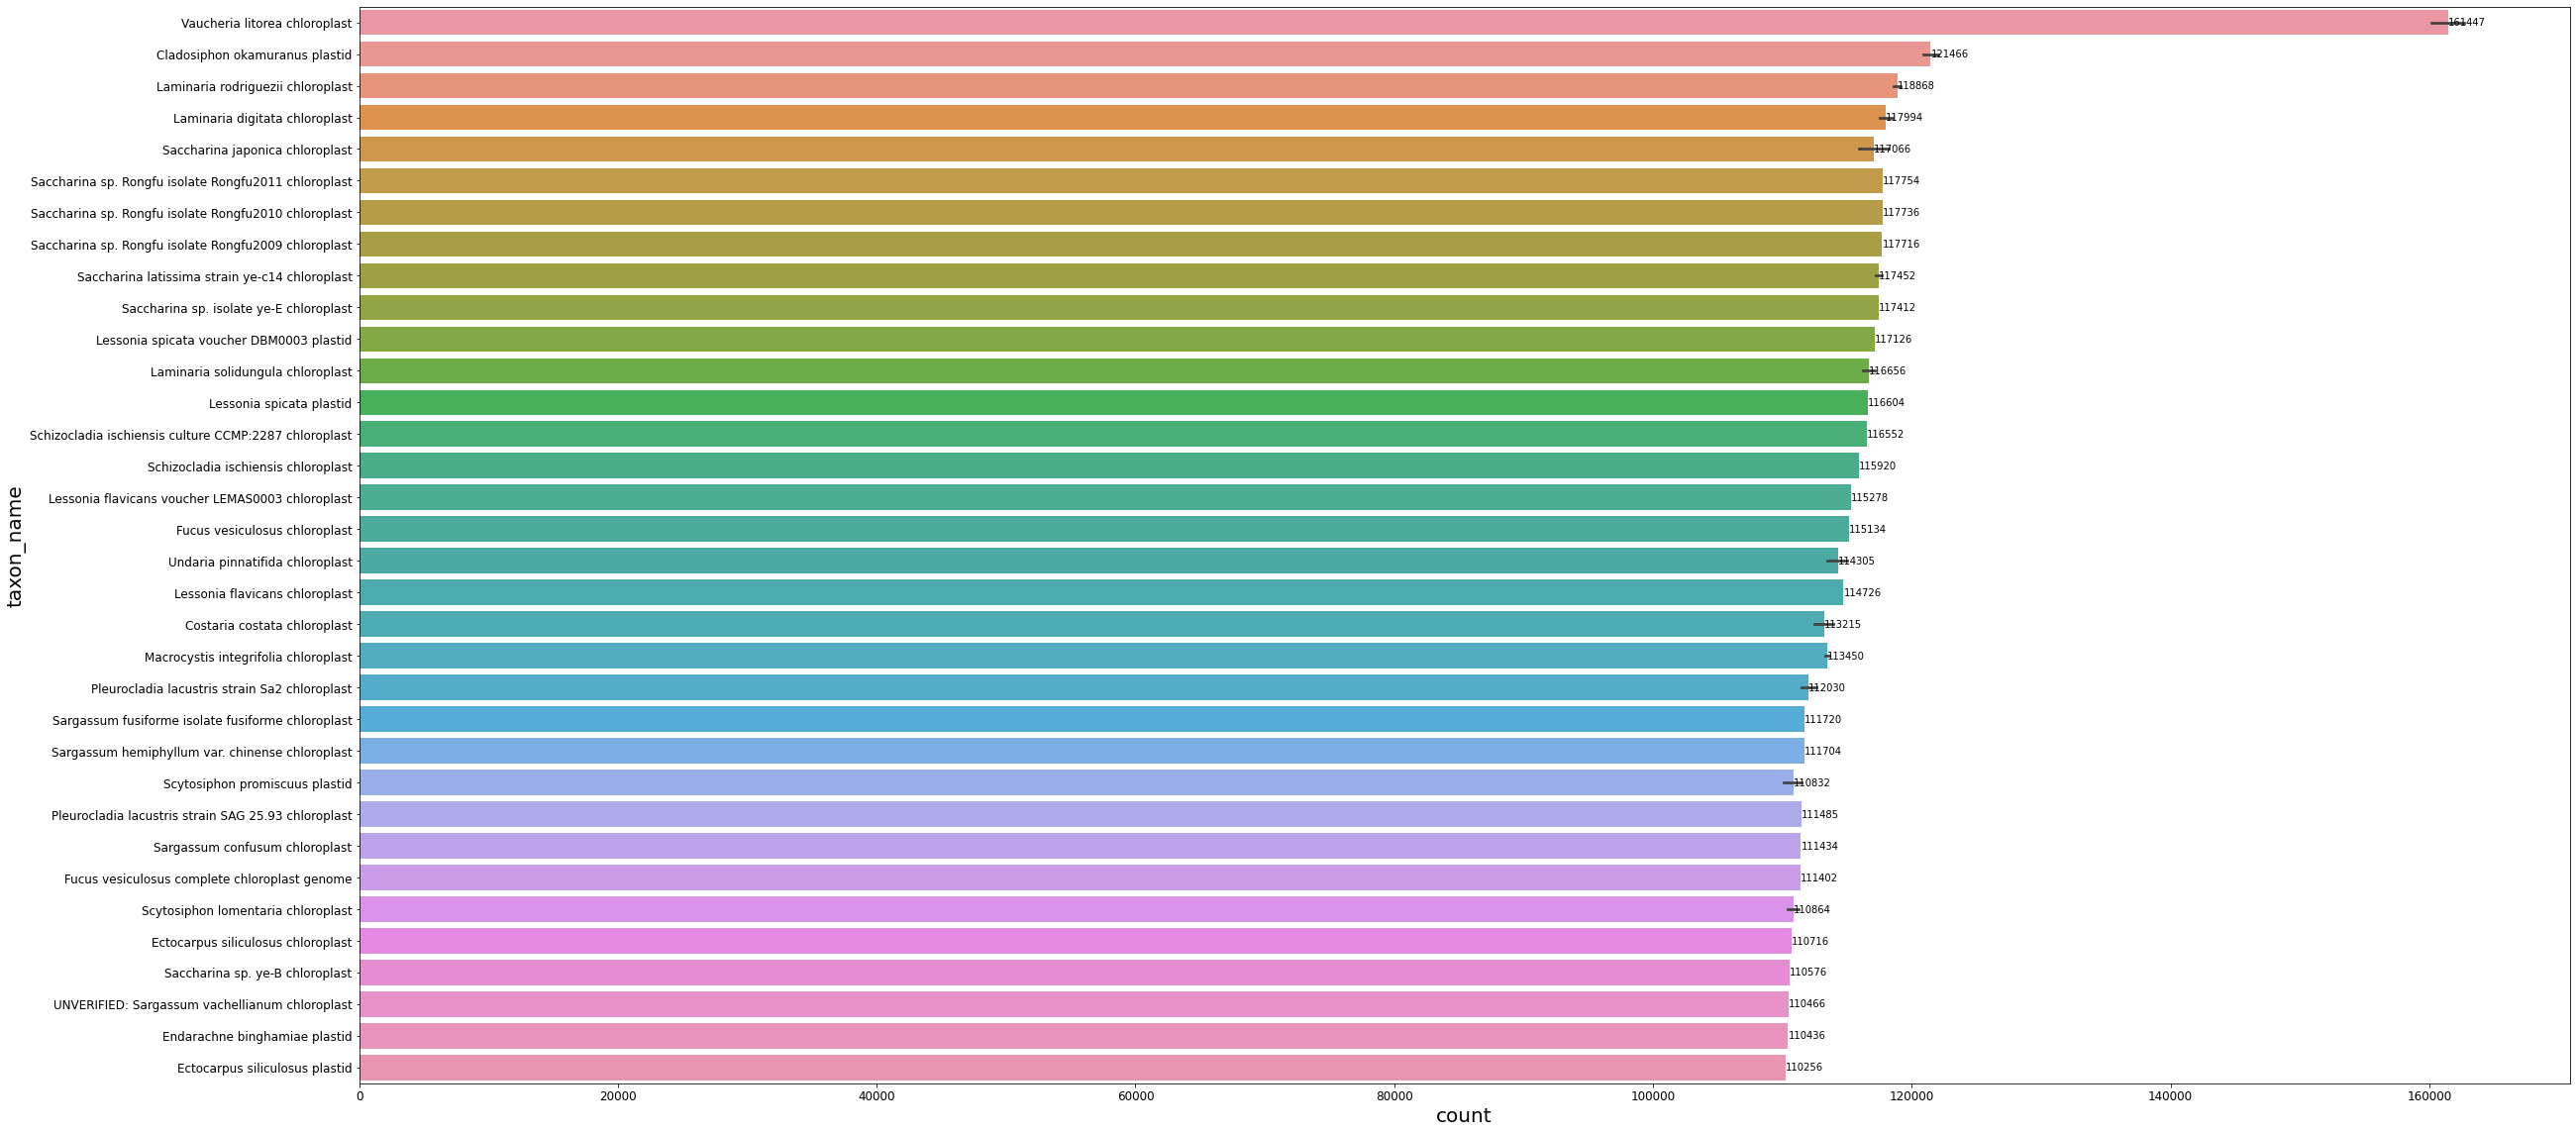

In [57]:
plt.figure(figsize = (40,20))
ax = sns.barplot(y='taxon_name', x='count', data=df[df['count'] >= 110000])
ax.set_xlabel("count",fontsize=20)
ax.set_ylabel("taxon_name",fontsize=20)
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')
    
plt.savefig('03_Nov112020_1e-6.jpeg', dpi=700)

In [ ]:
# Create a new column describing how long the alignment is on the query sequence
qaln_length = abs(results['query_end'] - results['query_start']) + 1
print(qaln_length)

In [ ]:
# Add qaln_length to the results table as a new column
results['qaln_length'] = qaln_length
results.head()

In [ ]:
# Create a scatterplot
results.plot.scatter('pc_identity', 'e_value')
plt.title("E value vs %identity");              # add a title to the plot

In [ ]:
# SOLUTION - EXERCISE 01
# !! Do not execute this cell if skipping computational step !!

# We can reuse the directories and db, but need to define new input/output filenames
query = os.path.join(datadir, 'lantibiotic.fasta')                                   # query sequence(s)
blastout = os.path.join(outdir, 'lantibiotic_blastx_kitasatospora.tab')              # BLAST output

# Create command-line for BLASTX
cmd_blastx = NcbiblastxCommandline(query=query, out=blastout, outfmt=6, db=db)

# Run BLASTX, and catch STDOUT/STDERR
stdout, stderr = cmd_blastx()

# Check STDOUT, STDERR
print("STDOUT: %s" % stdout)
print("STDERR: %s" % stderr)

In [ ]:
# !! Uncomment the line below, if skipping computational step !!
# blastout = os.path.join('prepped', 'kitasatospora', 'lantibiotic_blastx_kitasatospora.tab')

# Read BLASTX output, and reuse the column headers defined earlier
results = pd.read_csv(blastout, sep="\t", header=None)
results.columns = headers

# Create a scatterplot
results.plot.scatter('bitscore', 'pc_identity')
plt.title("%identity vs bitscore");  